Using the data from the 2013_NYC_CD_MedianIncome_Recycle.xlsx file, create a predictor using the weights from the model. This time, use the built in attributes in your model rather than hard-coding them into your algorithm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

df = pd.read_excel('2013_NYC_CD_MedianIncome_Recycle.xlsx')

In [2]:
df.head()

,CD_Name,MdHHIncE,RecycleRate
0,"Battery Park City, Greenwich Village & Soho",119596,0.286771
1,"Battery Park City, Greenwich Village & Soho",119596,0.264074
2,Chinatown & Lower East Side,40919,0.156485
3,"Chelsea, Clinton & Midtown Business Distric",92583,0.235125
4,"Chelsea, Clinton & Midtown Business Distric",92583,0.246725


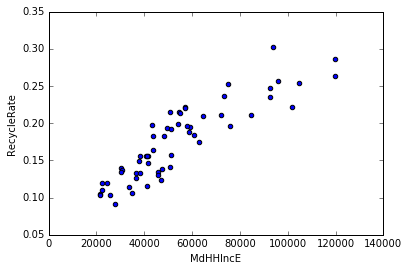

In [3]:
df.plot(kind='scatter',x='MdHHIncE',y='RecycleRate')

In [4]:
df.columns = ['location', 'median_income', 'recycle_rate']

In [5]:
df.corr()['median_income']['recycle_rate']

0.8847831827851157

In [6]:
lm = smf.ols(formula="recycle_rate~median_income",data=df).fit()
intercept, slope = lm.params
lm.params

Intercept        0.074804
median_income    0.000002
dtype: float64

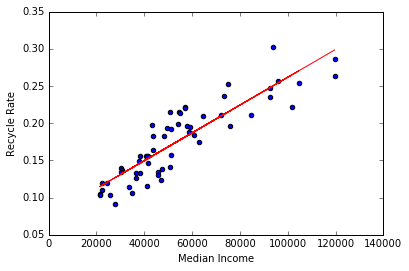

In [7]:
df.plot(kind="scatter",x="median_income",y="recycle_rate")
plt.plot(df["median_income"],slope*df["median_income"]+intercept,"-",color="red") 
plt.xlabel('Median Income')
plt.ylabel('Recycle Rate')

In [8]:
def predicting_recylerate(income):
    return intercept + float(income) * slope

In [9]:
x = input('What is the median income of your location? ')

print('Expected recycling rate : ' + str(round(predicting_recylerate(x), 2)))

What is the median income of your location? 40919
Expected recycling rate : 0.15
